In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn .metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('penguins.csv')
df.drop(columns=['rowid'], inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [4]:
# Remove the chinstrap species to get just the Adelie and Gentoo
df = df[df['species'] != 'Chinstrap']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 275
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            265 non-null    object 
 1   island             265 non-null    object 
 2   bill_length_mm     265 non-null    float64
 3   bill_depth_mm      265 non-null    float64
 4   flipper_length_mm  265 non-null    float64
 5   body_mass_g        265 non-null    float64
 6   sex                265 non-null    object 
 7   year               265 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 18.6+ KB


In [5]:
# Convert categorical variables into integer classes
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'], test_size=0.30, random_state=11)

In [7]:
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

y_pred_train_bayes = Bayes_model.predict(x_train)
y_pred_test_bayes = Bayes_model.predict(x_test)

print("Train accuracy: " + str(accuracy_score(y_train, y_pred_train_bayes)))
print("Test accuracy: " + str(accuracy_score(y_test, y_pred_test_bayes)))
print(classification_report(y_test, y_pred_test_bayes))

Train accuracy: 1.0
Test accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [8]:
Logistic_model = LogisticRegression()
Logistic_model.fit(x_train, y_train)

y_pred_train_lr = Logistic_model.predict(x_train)
y_pred_test_lr = Logistic_model.predict(x_test)

print("Train accuracy: " + str(accuracy_score(y_train, y_pred_train_lr)))
print("Test accuracy: " + str(accuracy_score(y_test, y_pred_test_lr)))
print(classification_report(y_test, y_pred_test_lr))

Train accuracy: 1.0
Test accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Both the Naive Bayes and Logistic Regression classifier perform equally well on the dataset, scoring 100% accuracy on 80 test samples and 185 training samples.  With such a small dataset, it is difficult to decipher which model performs better.

Scaling down the training and test data to just 5% train and 95% test we finally see a difference, with Bayes scoring 100% test accuracy on 252 test samples and logistic regression scoring 98% test accuracy.  Both models achieved 100% training accuracy

These high accuracies can be explained by how easily separated the classes are.  Using the seaborn library we can graph the relationships between all pairs of features, and color them based on which class they belong to.  In most of these graphs, the classes are almost completely linearly separable, so it makes sense that in high-dimenional space both models are able to achieve perfect accuracy with even just a few training samples.

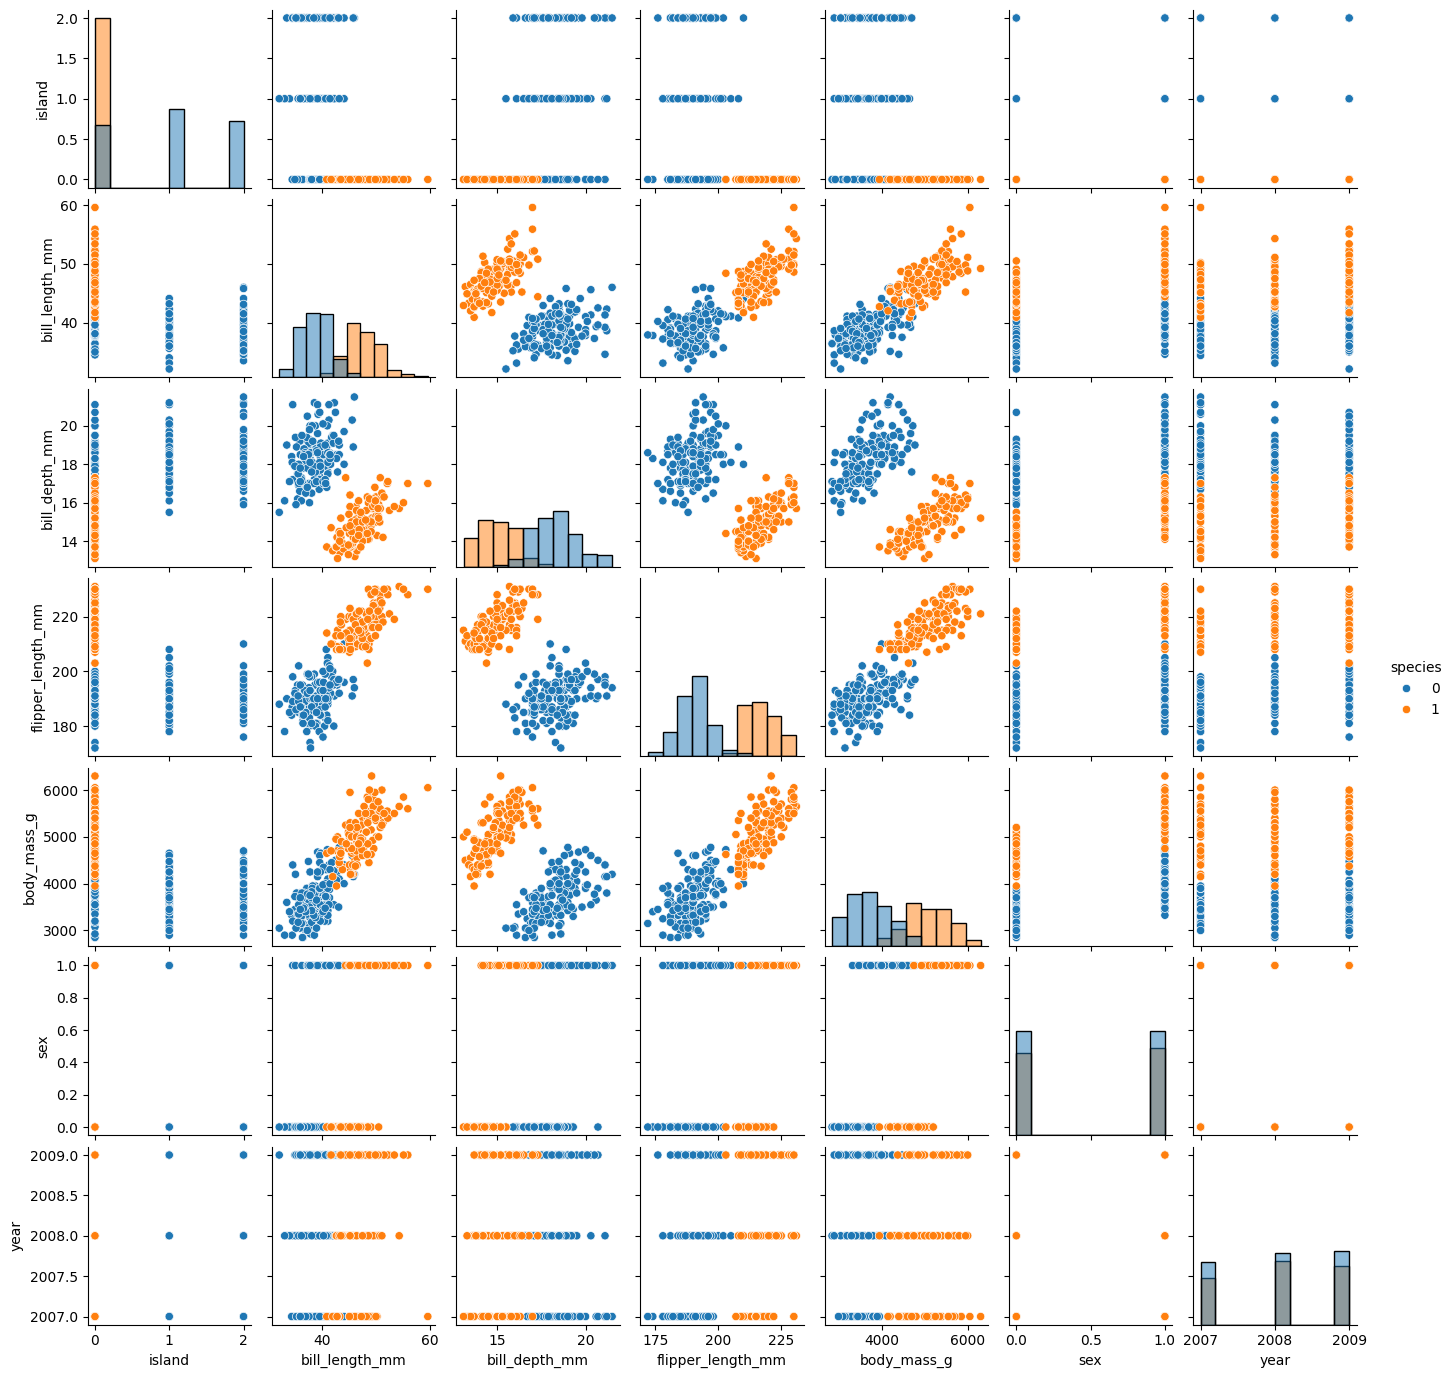

In [9]:
sns.pairplot(df, hue="species", height=2,diag_kind="hist")

In [10]:
# Area under the ROC Curve
auc_bayes = roc_auc_score(y_test, y_pred_test_bayes)
auc_lr = roc_auc_score(y_test, y_pred_test_lr)

print('AUC Bayes: %.4f' % auc_bayes)
print('AUC LR: %.4f' % auc_lr)

AUC Bayes: 1.0000
AUC LR: 1.0000


Since both models have such high accuracies, they both have 1.00 AUC because they can perfectly separate the classes.  If we make the dataset more challenging to work with by creating a subset of only a handful of features, such as bill_depth_mm and sex, then the models do not get perfect accuracy anymore, but still very high.  Here, the AUC for both models is 0.9857 as they perform identically.

In [11]:
subset_df = df[['bill_depth_mm', 'sex', 'species']]
x_train_sub, x_test_sub, y_train_sub, y_test_sub = train_test_split(subset_df.drop('species', axis=1), subset_df['species'], test_size=0.2, random_state=11)

In [12]:
Bayes_model = GaussianNB()
Bayes_model.fit(x_train_sub, y_train_sub)

y_pred_train_bayes = Bayes_model.predict(x_train_sub)
y_pred_test_bayes = Bayes_model.predict(x_test_sub)

print("Bayes Train accuracy: " + str(accuracy_score(y_train_sub, y_pred_train_bayes)))
print("Bayes Test accuracy: " + str(accuracy_score(y_test_sub, y_pred_test_bayes)))
print(classification_report(y_test_sub, y_pred_test_bayes))

Logistic_model = LogisticRegression()
Logistic_model.fit(x_train_sub, y_train_sub)

y_pred_train_lr = Logistic_model.predict(x_train_sub)
y_pred_test_lr = Logistic_model.predict(x_test_sub)

print("LR Train accuracy: " + str(accuracy_score(y_train_sub, y_pred_train_lr)))
print("LR Test accuracy: " + str(accuracy_score(y_test_sub, y_pred_test_lr)))
print(classification_report(y_test_sub, y_pred_test_lr))

# Area under the ROC Curve
auc_bayes = roc_auc_score(y_test_sub, y_pred_test_bayes)
auc_lr = roc_auc_score(y_test_sub, y_pred_test_lr)

print('AUC Bayes: %.4f' % auc_bayes)
print('AUC LR: %.4f' % auc_lr)

Bayes Train accuracy: 0.9339622641509434
Bayes Test accuracy: 0.9811320754716981
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        18

    accuracy                           0.98        53
   macro avg       0.97      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53

LR Train accuracy: 0.9764150943396226
LR Test accuracy: 0.9811320754716981
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        18

    accuracy                           0.98        53
   macro avg       0.97      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53

AUC Bayes: 0.9857
AUC LR: 0.9857


Lastly to further attempt to differentiate the models, we can predict the species of penguin when there is signficant class imbalance.  Here, we drop 90% of one species so there are very few instances to be trained on for one class, but still the models perform similarly.

In [13]:
num_rows = subset_df[df["species"] == 1]
num_to_keep = int(len(num_rows) * 0.1)
scaled_class = num_rows.sample(num_to_keep, random_state=11)

imbalance_df = pd.concat([subset_df[subset_df["species"] != 1], scaled_class])
imbalance_df = imbalance_df.reset_index(drop=True)

In [14]:
x_train_sub, x_test_sub, y_train_sub, y_test_sub = train_test_split(imbalance_df.drop('species', axis=1), imbalance_df['species'], test_size=0.2, random_state=11)

print(x_train_sub.shape)
print(y_train_sub.shape)

Bayes_model = GaussianNB()
Bayes_model.fit(x_train_sub, y_train_sub)

y_pred_train_bayes = Bayes_model.predict(x_train_sub)
y_pred_test_bayes = Bayes_model.predict(x_test_sub)

print("Bayes Train accuracy: " + str(accuracy_score(y_train_sub, y_pred_train_bayes)))
print("Bayes Test accuracy: " + str(accuracy_score(y_test_sub, y_pred_test_bayes)))
print(classification_report(y_test_sub, y_pred_test_bayes))

Logistic_model = LogisticRegression()
Logistic_model.fit(x_train_sub, y_train_sub)

y_pred_train_lr = Logistic_model.predict(x_train_sub)
y_pred_test_lr = Logistic_model.predict(x_test_sub)

print("LR Train accuracy: " + str(accuracy_score(y_train_sub, y_pred_train_lr)))
print("LR Test accuracy: " + str(accuracy_score(y_test_sub, y_pred_test_lr)))
print(classification_report(y_test_sub, y_pred_test_lr))

# Area under the ROC Curve
auc_bayes = roc_auc_score(y_test_sub, y_pred_test_bayes)
auc_lr = roc_auc_score(y_test_sub, y_pred_test_lr)

print('AUC Bayes: %.4f' % auc_bayes)
print('AUC LR: %.4f' % auc_lr)

(125, 2)
(125,)
Bayes Train accuracy: 0.984
Bayes Test accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32

LR Train accuracy: 0.992
LR Test accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32

AUC Bayes: 0.8333
AUC LR: 0.8333


We can also show the lift and gain graphs using the calculated probabilities for the model guessing each class.  This shows the cumulative confidence of the models in its predictions.

In [15]:
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

y_probs_bayes = Bayes_model.predict_proba(x_test)

Logistic_model = LogisticRegression()
Logistic_model.fit(x_train, y_train)

y_probs_lr = Logistic_model.predict_proba(x_test)

In [16]:
# Sort the data by descending probabilities
bayes_indices = np.argsort(y_probs_bayes[:, -1])[::-1]
lr_indices = np.argsort(y_probs_lr[:, -1])[::-1]

y_probs_bayes_sorted = y_probs_bayes[bayes_indices]
y_probs_lr_sorted = y_probs_lr[lr_indices]

# Split into buckets
num_buckets = 10

bayes_buckets = np.array_split(y_probs_bayes_sorted, num_buckets)
lr_buckets = np.array_split(y_probs_lr_sorted, num_buckets)

# Calculate cumulative probabilities inside each bucket
cumulative_pos_bayes = 0
cumulative_pos_lr = 0
total_pos = np.sum(y_test)

cumulative_gain_bayes = []
cumulative_gain_lr = []
cumulative_lift_bayes = []
cumulative_lift_lr = []

for i in range(num_buckets):
    cumulative_pos_bayes += np.sum(bayes_buckets[i][:, -1])
    cumulative_gain_bayes.append(cumulative_pos_bayes / total_pos)
    cumulative_lift_bayes.append(cumulative_gain_bayes[i] / (i + 1))

    cumulative_pos_lr += np.sum(lr_buckets[i][:, -1])
    cumulative_gain_lr.append(cumulative_pos_lr / total_pos)
    cumulative_lift_lr.append(cumulative_gain_lr[i] / (i + 1))



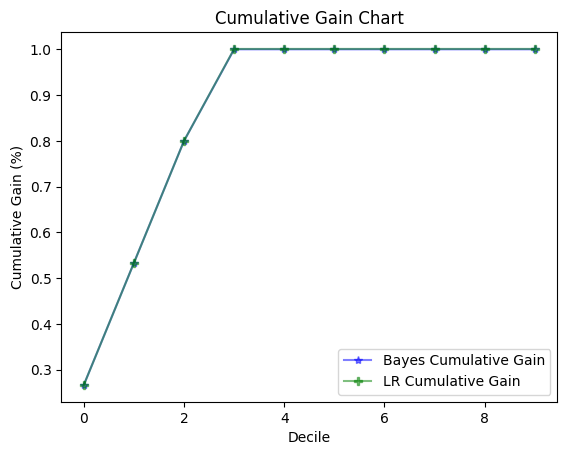

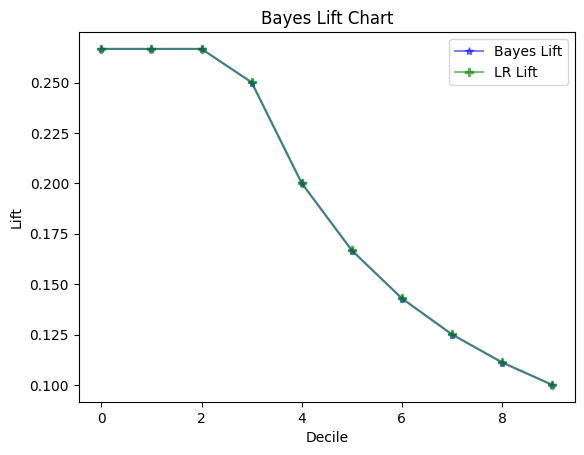

In [17]:
# Cumulative Gain Chart
plt.plot(range(num_buckets), cumulative_gain_bayes, marker="*", label="Bayes Cumulative Gain", color='blue', alpha=0.5)
plt.plot(range(num_buckets), cumulative_gain_lr, marker="P", label="LR Cumulative Gain", color='green', alpha=0.5)
plt.title("Cumulative Gain Chart")
plt.xlabel("Decile")
plt.ylabel("Cumulative Gain (%)")
plt.legend()
plt.show()

# Lift Chart
plt.plot(range(num_buckets), cumulative_lift_bayes, marker="*", label="Bayes Lift", color='blue', alpha=0.5)
plt.plot(range(num_buckets), cumulative_lift_lr, marker="P", label="LR Lift", color='green', alpha=0.5)
plt.title("Bayes Lift Chart")
plt.xlabel("Decile")
plt.ylabel("Lift")
plt.legend()
plt.show()

The charts show that predictions for some of the instances are not super confident, but most of them have very high confidence.  Furthermore, both the models perform nearly identically with similar if not identical probability predictions.  We can also test on our smaller subset of data where they models performed slightly different

In [18]:
Bayes_model = GaussianNB()
Bayes_model.fit(x_train_sub, y_train_sub)

y_probs_bayes = Bayes_model.predict_proba(x_test_sub)

Logistic_model = LogisticRegression()
Logistic_model.fit(x_train_sub, y_train_sub)

y_probs_lr = Logistic_model.predict_proba(x_test_sub)

In [19]:
# Sort the data by descending probabilities
bayes_indices = np.argsort(y_probs_bayes[:, -1])[::-1]
lr_indices = np.argsort(y_probs_lr[:, -1])[::-1]

y_probs_bayes_sorted = y_probs_bayes[bayes_indices]
y_probs_lr_sorted = y_probs_lr[lr_indices]

# Split into buckets
num_buckets = 10

bayes_buckets = np.array_split(y_probs_bayes_sorted, num_buckets)
lr_buckets = np.array_split(y_probs_lr_sorted, num_buckets)

# Calculate cumulative probabilities inside each bucket
cumulative_pos_bayes = 0
cumulative_pos_lr = 0
total_pos = np.sum(y_test)

cumulative_gain_bayes = []
cumulative_gain_lr = []
cumulative_lift_bayes = []
cumulative_lift_lr = []

for i in range(num_buckets):
    cumulative_pos_bayes += np.sum(bayes_buckets[i][:, -1])
    cumulative_gain_bayes.append(cumulative_pos_bayes / total_pos)
    cumulative_lift_bayes.append(cumulative_gain_bayes[i] / (i + 1))

    cumulative_pos_lr += np.sum(lr_buckets[i][:, -1])
    cumulative_gain_lr.append(cumulative_pos_lr / total_pos)
    cumulative_lift_lr.append(cumulative_gain_lr[i] / (i + 1))

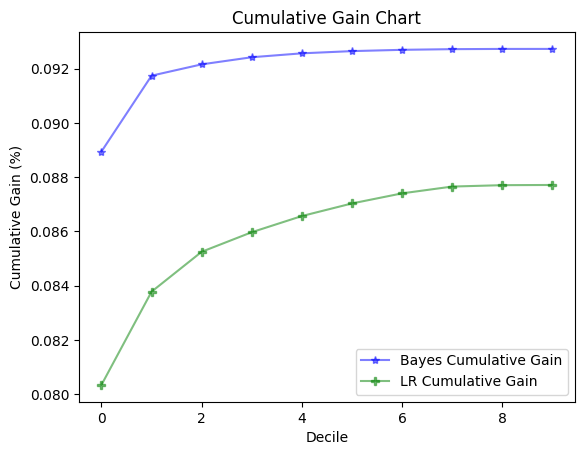

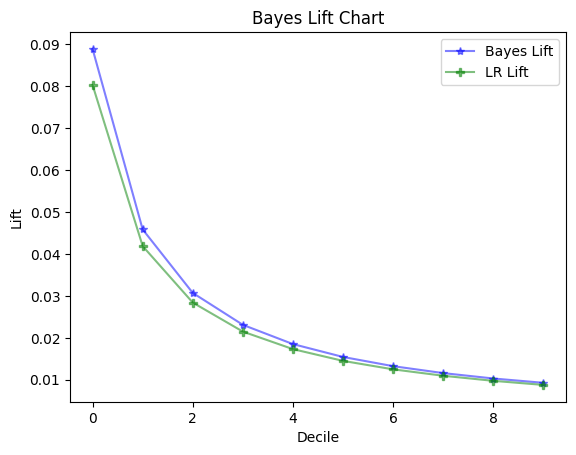

In [20]:
# Cumulative Gain Chart
plt.plot(range(num_buckets), cumulative_gain_bayes, marker="*", label="Bayes Cumulative Gain", color='blue', alpha=0.5)
plt.plot(range(num_buckets), cumulative_gain_lr, marker="P", label="LR Cumulative Gain", color='green', alpha=0.5)
plt.title("Cumulative Gain Chart")
plt.xlabel("Decile")
plt.ylabel("Cumulative Gain (%)")
plt.legend()
plt.show()

# Lift Chart
plt.plot(range(num_buckets), cumulative_lift_bayes, marker="*", label="Bayes Lift", color='blue', alpha=0.5)
plt.plot(range(num_buckets), cumulative_lift_lr, marker="P", label="LR Lift", color='green', alpha=0.5)
plt.title("Bayes Lift Chart")
plt.xlabel("Decile")
plt.ylabel("Lift")
plt.legend()
plt.show()

Now with this smaller subset we see a difference in the models.  Naive Bayes performs slightly better and shows higher confidence with great gain and lift.  This means the generative model makes more positive observations when there is lower confidence in the prediction.

Comparing Naive Bayes and Logistic Regression as a whole, both perform extremely similarly on this dataset despite their different approaches.  Logistic Regression is a discriminative model and predicts the probabilities of outcomes assuming linear separability, while Naive Bayes predicts the  probabilities given observed input using conditional independence.  Both models are very efficient, however, logistic regression is typically suited for simpler data that can be linearly separated and struggles to model complex relationships.  Fortunately, this data has a very simple relationship as depicted earlier in the graphs.  Even just a couple features and heavy class imbalance there is still a clear boundary between the penguin species, but logistic regression's sensitivity to outliers in imbalanced datasets suggests it performs slightly worse.

When it comes to classifying two penguin species on a small amount of data, logistic regression may be better suited for the task.  Overall, however, Naive Bayes is a better choice because it can handle more variety in the data, and model more relationships all while fitting the data more quickly than logistic regression.  From the gain and lift charts, we see that it is also better in low-confident predictions, and therefore slightly beats out logistic regression.

In [21]:
# Compare the models against a more complex dataset such as MNIST for a multiclass problem
df = pd.read_csv('sample_data/mnist_train_small.csv')
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.30, random_state=11)

print(x_train.shape)
print(y_train.shape)

(13999, 784)
(13999,)


In [28]:
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

y_pred_train_bayes = Bayes_model.predict(x_train)
y_pred_test_bayes = Bayes_model.predict(x_test)

print("Bayes Train accuracy: " + str(accuracy_score(y_train, y_pred_train_bayes)))
print("Bayes Test accuracy: " + str(accuracy_score(y_test, y_pred_test_bayes)))

lr_model = LogisticRegression(multi_class='multinomial')
lr_model.fit(x_train, y_train)

y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr = lr_model.predict(x_test)

print("LR Train accuracy: " + str(accuracy_score(y_train, y_pred_train_lr)))
print("LR Test accuracy: " + str(accuracy_score(y_test, y_pred_test_lr)))

Bayes Train accuracy: 0.569254946781913
Bayes Test accuracy: 0.5563333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR Train accuracy: 0.9603543110222159
LR Test accuracy: 0.8903333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


While we hypothesized that Naive Bayes may perform better, when fitting the models to the MNIST dataset, a 10-class problem where the models take in flattened greyscale pixel values to predict handwritten numbers, the logistic regression model overwhelmingly outperforms Naive Bayes.  Using a dataset of 20,000 instances and splitting this among training and testing, Bayes gets around 55.6% accuracy while Logistic Regression achieves 89.0% accuracy.  We can further compare these using other metrics as well.

In [29]:
# Classification report for F1, precision, and recall
print('Naive Bayes:')
print(classification_report(y_test, y_pred_test_bayes))

print('\nLogistic Regression:')
print(classification_report(y_test, y_pred_test_lr))

y_probs_bayes = Bayes_model.predict_proba(x_test)
y_probs_lr = lr_model.predict_proba(x_test)

# Area under the ROC Curve averaged across all ten classes
bayes_auc_scores = []
lr_auc_scores = []
for class_label in range(y_probs_bayes.shape[1]):
  y_test_class = (y_test == class_label).astype(int)

  y_probs_bayes_class = y_probs_bayes[:, class_label]
  y_probs_lr_class = y_probs_lr[:, class_label]

  bayes_auc_scores.append(roc_auc_score(y_test_class, y_probs_bayes_class))
  lr_auc_scores.append(roc_auc_score(y_test_class, y_probs_lr_class))

print('Average AUC Bayes: %.4f' % np.mean(bayes_auc_scores))
print('Average AUC LR: %.4f' % np.mean(lr_auc_scores))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.61      0.92      0.74       580
           1       0.68      0.95      0.79       661
           2       0.84      0.26      0.39       573
           3       0.77      0.36      0.49       609
           4       0.80      0.32      0.45       590
           5       0.56      0.05      0.09       555
           6       0.62      0.93      0.74       596
           7       0.88      0.34      0.49       646
           8       0.31      0.45      0.37       575
           9       0.38      0.92      0.54       615

    accuracy                           0.56      6000
   macro avg       0.65      0.55      0.51      6000
weighted avg       0.65      0.56      0.52      6000


Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       580
           1       0.93      0.97      0.95       661
           2       0.89      0.85      0.87

From these expanded metrics we can see that Naive Bayes struggles with certain classes, particularly with 3s, 5s, and 8s while Logistic Regression does perform worse on these than other numbers but still superior to any class of Bayes.  This stark difference in performance is likely due to the design of the generative model assuming feature independence when image data typically does not have this relationship among features.  On the other hand, since Logistic Regression does not assume this, it is able to handle continuous data more effectively and is able to easily outperform Naive Bayes.  Altogether, while Naive Bayes may be a more versatile model, it is clearly not great in all applications such as image classification, and better suited for contexts where inputs are dependent on each other, such as with text prompts.  Logistic Regression may be a more rigid model but excels in simple classification problems such as these.